In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
portfolioValueDevelopment = np.load("portfolioValueDevelopment.npy")
daily = np.load("dailyReturns.npy")
cumulative = np.load("cumulativeReturns.npy")

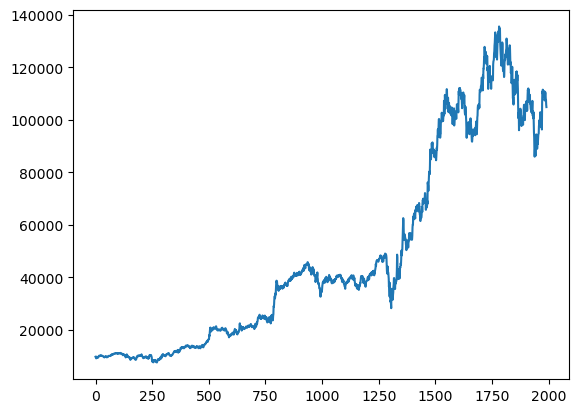

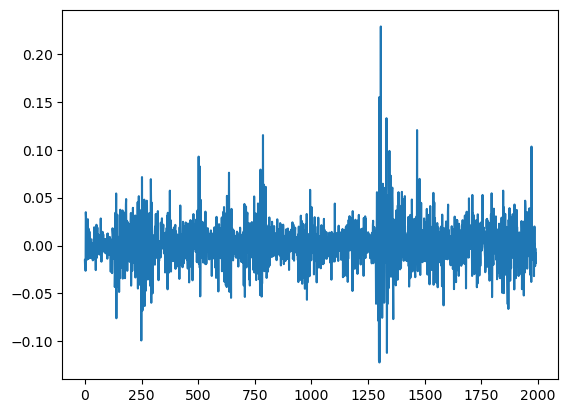

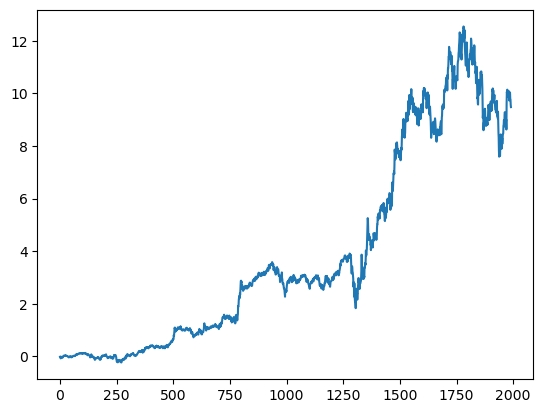

In [51]:
plt.plot(portfolioValueDevelopment)
plt.show()
plt.plot(daily)
plt.show()
plt.plot( (1 + daily).cumprod() - 1)
plt.show()

In [41]:
np.cumprod([dr for dr in daily])

array([ 0.983001  ,  0.96105765,  0.94783478, ..., 21.87938456,
       21.47463537, 21.30384326])

In [52]:
from datetime import datetime, timedelta
import numpy as np
import holidays

# Starting date
start_date = datetime(2015, 1, 2)

# Define the list of holidays (you can customize it according to your needs)
us_holidays = holidays.US()

# Define a function to check if a given date is a business day (Monday to Friday) and not a holiday
def is_trading_day(date):
    return date.weekday() < 5 and date not in us_holidays

# Generate the list of trading days
trading_day_list = []
current_date = start_date
while len(trading_day_list) < 1991:
    if is_trading_day(current_date):
        trading_day_list.append(current_date)
    current_date += timedelta(days=1)

# Convert dates to string format
trading_day_list_str = [date.strftime('%Y-%m-%d') for date in trading_day_list]

# Printing the list of trading days
print(trading_day_list_str)


['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16', '2015-01-20', '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-26', '2015-01-27', '2015-01-28', '2015-01-29', '2015-01-30', '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06', '2015-02-09', '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13', '2015-02-17', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-23', '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27', '2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13', '2015-03-16', '2015-03-17', '2015-03-18', '2015-03-19', '2015-03-20', '2015-03-23', '2015-03-24', '2015-03-25', '2015-03-26', '2015-03-27', '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02', '2015-04-03', '2015-04-06', '2015-04-07', '2015-04-08', '2015-04-09', '2015-04-10', '2015-04-13', '2015-04-14', '2015

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


lendates 2072
len cumreturns 1991


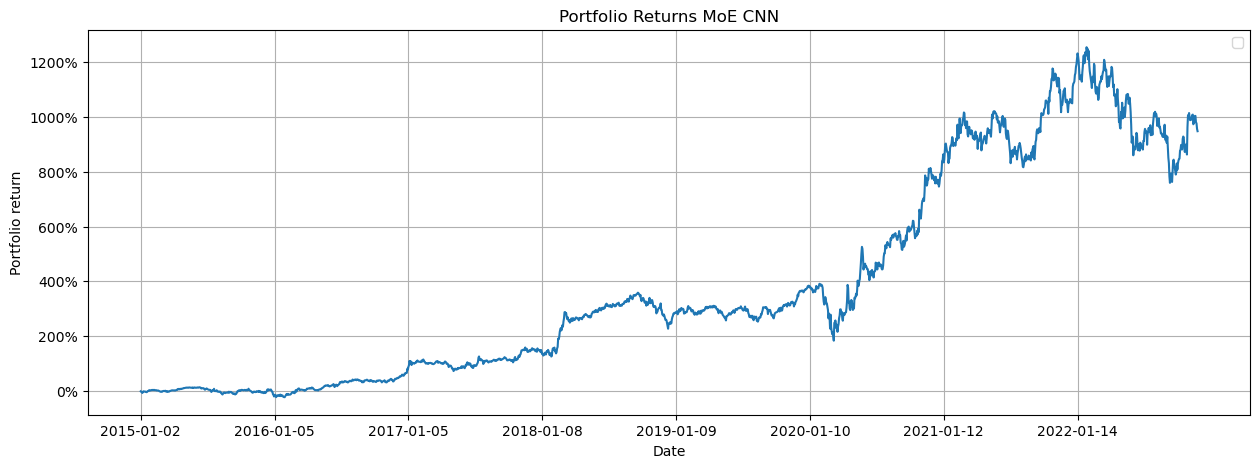

<Figure size 640x480 with 0 Axes>

In [53]:
from matplotlib.ticker import FuncFormatter

testDataStart = "2015-01-02"
testDataEnd = "2022-12-12"

# total growth

dates = pd.date_range(start=testDataStart, end=testDataEnd, freq='B')  # Business days frequency
def to_percent(y, _):
    return '{:.0f}%'.format(y * 100)

formatter = FuncFormatter(to_percent)

cumReturns = np.cumprod([dr+1 for dr in daily]) -1
print(f"lendates {len(dates)}")
print(f"len cumreturns {len(cumReturns)}")
plt.figure(figsize=(15, 5))
plt.plot(trading_day_list_str, cumReturns, linestyle='-')
plt.title("Portfolio Returns MoE CNN")
plt.ylabel("Portfolio return")
plt.xlabel("Date")
plt.xticks(trading_day_list_str[::252])
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("cumReturns.png")

In [22]:
list(cumReturns)[200]

3.398693342719386e+60